In [648]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = ".." # opendc-experiments-metamodel/src/main

# Read and explore output file

In [649]:
path = f"{base_folder}/output/host/topology=multi/workload=bitbrains-small/seed=0/"


In [650]:
def mean_of_chunks(series, chunk_size):
    # Explicitly setting numeric_only to True to avoid FutureWarning about deprecation
    return series.groupby(np.arange(len(series)) // chunk_size).mean(numeric_only=True)

# Output data in host

In [651]:
"""
We extract and analyze the data exported in the .parquet, from the host, as a very first step towards creating a metamodel
"""
df_trace_0 = pd.read_parquet(path + "simulation=2024-01-07-17-14-07/single-linear-core-mem.parquet")

df_trace_1 = pd.read_parquet(path + "3-multis-active-servers.parquet")
df_trace_2 = pd.read_parquet(path + "3-multis-active-servers-inv.parquet")
df_trace_3 = pd.read_parquet(path + "3-multis-mem.parquet")
df_trace_4 = pd.read_parquet(path + "3-multis-mem-inv.parquet")
df_trace_5 = pd.read_parquet(path + "3-multis-core-mem.parquet")
df_trace_6 = pd.read_parquet(path + "3-multis-random.parquet")


In [652]:
df_trace_0

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,33,0,0,39600.0,39600.000000,39600.000000,1.000000,3600,0,1386,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:10:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,33,0,0,39600.0,39600.000000,39600.000000,1.000000,3600,0,1135,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:15:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,33,0,0,39600.0,39600.000000,39600.000000,1.000000,3600,0,1055,0,105000.000000,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:20:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,33,0,0,39600.0,39085.917969,39085.917969,0.987018,3553,46,0,0,103839.217740,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:25:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,33,0,0,39600.0,33016.652344,33016.652344,0.833754,3001,599,0,0,91281.546487,300000,0,1970-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17276,1970-03-01 23:45:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,10,0,0,39600.0,11339.710938,11339.710938,0.286356,860,2741,0,0,62582.648113,300000,0,1970-01-01 00:00:00+00:00
17277,1970-03-01 23:50:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,10,0,0,39600.0,11511.052734,11511.052734,0.290683,1033,2566,0,0,63707.984752,300000,0,1970-01-01 00:00:00+00:00
17278,1970-03-01 23:55:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,10,0,0,39600.0,13061.803711,13061.803711,0.329844,1069,2531,0,0,63977.322109,300000,0,1970-01-01 00:00:00+00:00
17279,1970-03-02 00:00:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,12,256000,0,10,0,0,39600.0,10848.648438,10848.648438,0.273956,1155,2445,0,0,64652.901320,300000,0,1970-01-01 00:00:00+00:00


<Axes: >

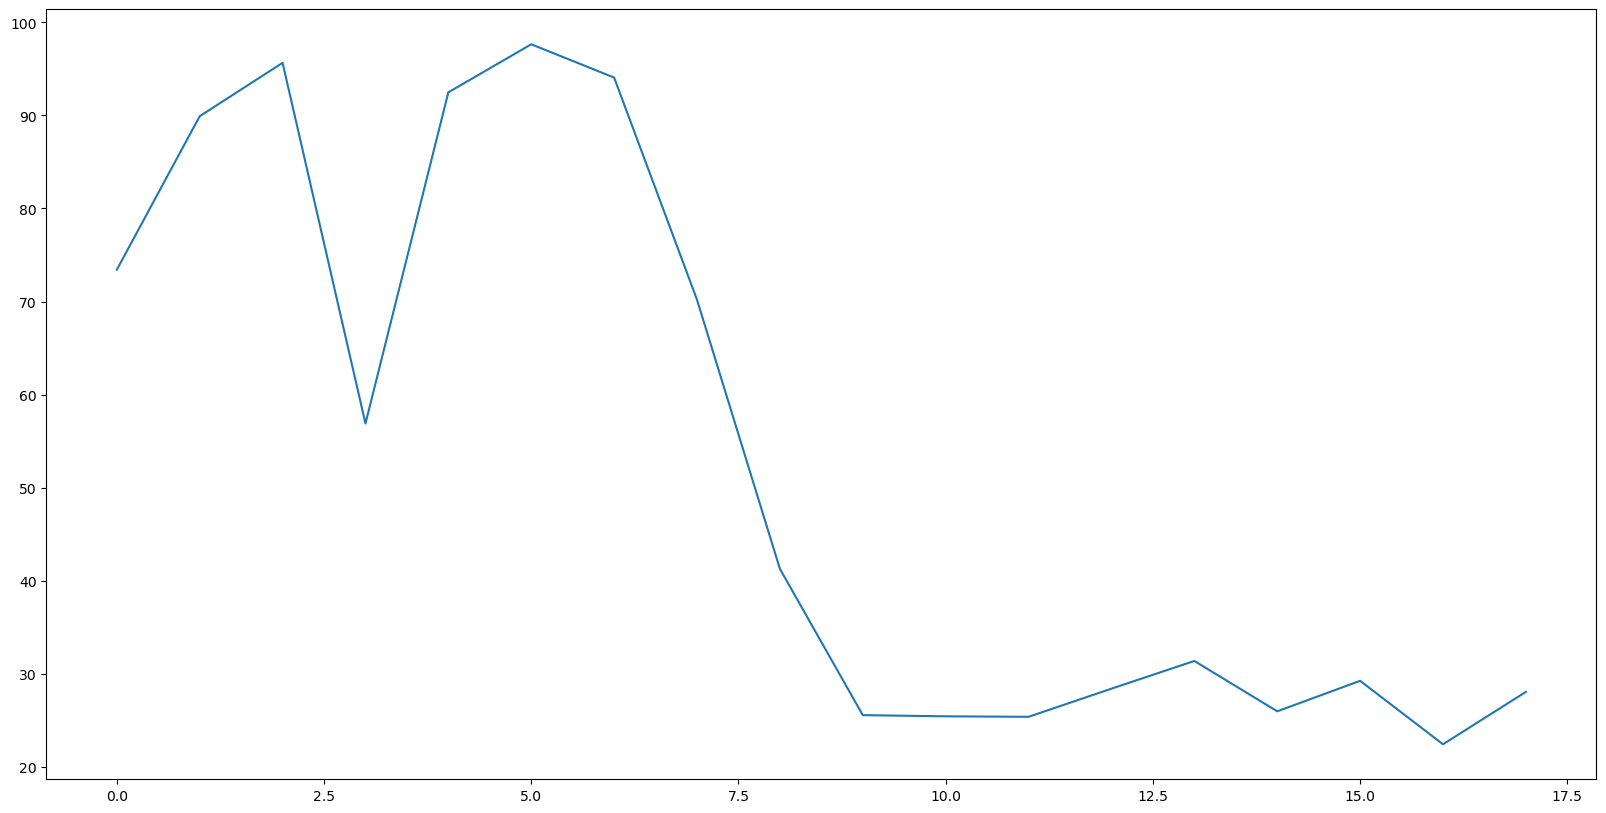

In [653]:
df_trace_0 = mean_of_chunks(df_trace_0, 1000)
df_trace_0 = df_trace_0.cpu_utilization * 100
plt.figure(figsize=(20, 10))
df_trace_0.plot(label="single-linear-core-mem")

In [654]:
df_trace_1 = mean_of_chunks(df_trace_1, 1000)
df_trace_2 = mean_of_chunks(df_trace_2, 1000)
df_trace_3 = mean_of_chunks(df_trace_3, 1000)
df_trace_4 = mean_of_chunks(df_trace_4, 1000)
df_trace_5 = mean_of_chunks(df_trace_5, 1000)
df_trace_6 = mean_of_chunks(df_trace_6, 1000)

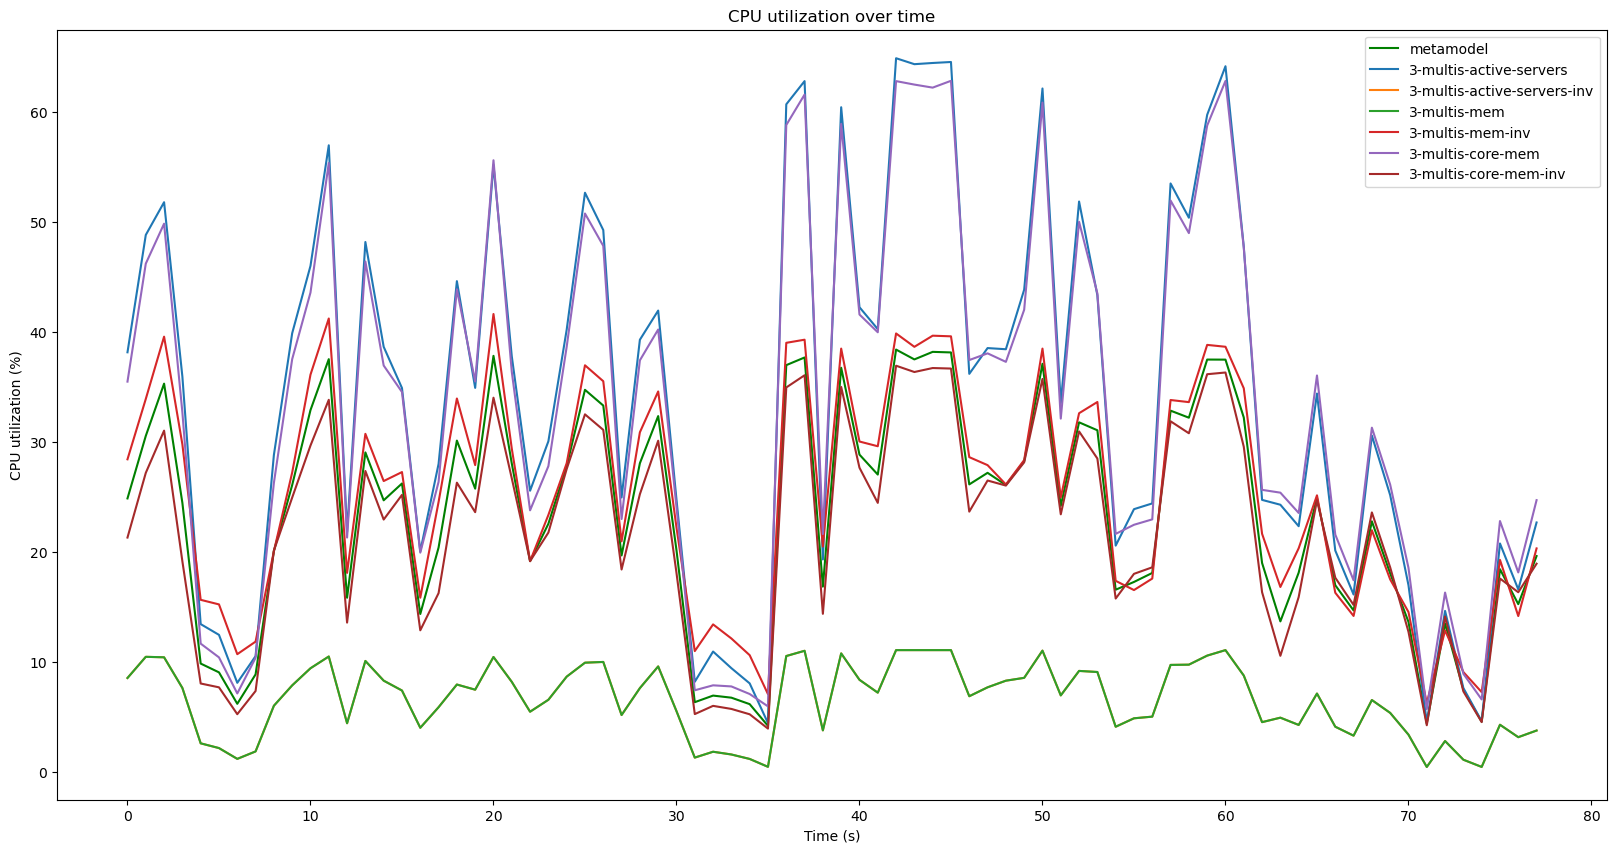

In [655]:
"""
Up to this point, we read the data from the .parquet file
"""
min_length = min(len(df_trace_1), len(df_trace_2), len(df_trace_3), len(df_trace_4),
                 len(df_trace_5), len(df_trace_6))
# Trim all DataFrames to the minimum length
df_trace_1 = df_trace_1[:min_length].cpu_utilization * 100
df_trace_2 = df_trace_2[:min_length].cpu_utilization * 100
df_trace_3 = df_trace_3[:min_length].cpu_utilization * 100
df_trace_4 = df_trace_4[:min_length].cpu_utilization * 100
df_trace_5 = df_trace_5[:min_length].cpu_utilization * 100
df_trace_6 = df_trace_6[:min_length].cpu_utilization * 100

# take the median of the others using numpy
df_metamodel = np.median([df_trace_1, df_trace_2, df_trace_3, df_trace_4, df_trace_5, df_trace_6], axis=0)


plt.figure(figsize=(20, 10))
plt.plot(df_metamodel, label="metamodel", color="green") # the metamodel
df_trace_1.plot(label="3-multis-active-servers")
df_trace_2.plot(label="3-multis-active-servers-inv")
df_trace_3.plot(label="3-multis-mem")
df_trace_4.plot(label="3-multis-mem-inv")
df_trace_5.plot(label="3-multis-core-mem")
df_trace_6.plot(label="3-multis-core-mem-inv", color="brown")


plt.legend()
plt.ylim(-2.5, 67.5)
plt.title("CPU utilization over time")
plt.xlabel("Time (s)")
plt.ylabel("CPU utilization (%)")
plt.show()